# Solución Ejercicio 3.2 de la Guía 2 de Econometría 
# Universidad Ean

04 de Septiembre del 2022

Ejercicio realizado por: 

Cristian Stiven Romero Bustos 

Ruben Andres Solano Corredor

Ana María Espitia Lopez

# Desarrollo punto 3.2

In [1]:
#Importamos las librerias iniciales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Leemos los datos de Stata y armamos nuestro Dataframe y lo llamamos df
df = pd.read_stata('Earnings_and_Height.dta')
#Visualisamos las variables y su información general
print("# de Registros, # de Columnas", df.shape)

# de Registros, # de Columnas (17870, 11)


# a. Corra una regresión de Earnings sobre Height

# a) Respuesta:

Pendiente Estimada (m) [1.5367701e-05]
Intercepto Estimado (b) 66.24298


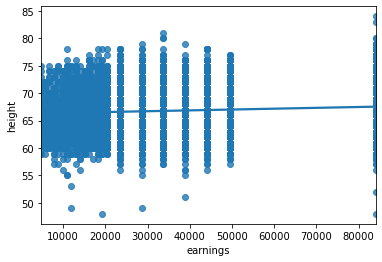

In [3]:
from sklearn import linear_model
regresion = linear_model.LinearRegression()
earnings = df['earnings'].values.reshape((-1, 1))
modelo = regresion.fit(earnings, df['height'])
print("Pendiente Estimada (m)", modelo.coef_)
print("Intercepto Estimado (b)", modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='earnings',y='height',data=df)

i. ¿Es la pendiente estimada estadísticamente significativa?

Respuesta: No, ya que es un numeró significativamente bajo, se explica al ver la gráfica e identificar que los datos son dispersos a la linea de tendencia, esto explica lo desagrupados que están los datos.

# b. Construya un intervalo de confianza al 95% para el coeficiente de pendiente

# b) Respuesta:

In [4]:
import numpy as np
import scipy.stats as st
df1= df['height']

In [5]:
 st.norm.interval (alpha = 0.95 , loc = np.mean(df1), scale = st.sem(df1))

(66.9051778918327, 67.02151888551106)

# Respuesta Análisis inicial:
Existe una probabilidad del 95% de que el intervalo de confianza de (66.9051778918327, 67.02151888551106) contenga Height media real de la población.

# i. Repita (a) para las mujeres

Pendiente Estimada Mujeres (m) [5.227632e-06]
Intercepto Estimado Mujeres (b) 64.254295
# de Registros que son Mujeres, # de Columnas (9974, 11)


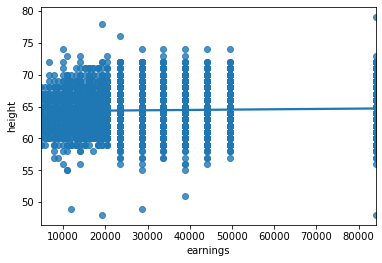

In [6]:
mdf=df[df['sex'].isin(['0:female'])]

from sklearn import linear_model
mregresion = linear_model.LinearRegression()
mearnings = mdf['earnings'].values.reshape((-1, 1))
mmodelo = mregresion.fit(mearnings, mdf['height'])
print("Pendiente Estimada Mujeres (m)", mmodelo.coef_)
print("Intercepto Estimado Mujeres (b)", mmodelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='earnings',y='height',data=mdf)

print("# de Registros que son Mujeres, # de Columnas", mdf.shape)


# ii. Repita (a) para los hombres

Pendiente Estimada Hombres (m) [5.227632e-06]
Intercepto Estimado Hombres (b) 64.254295
# de Registros que son Hombres, # de Columnas (7896, 11)


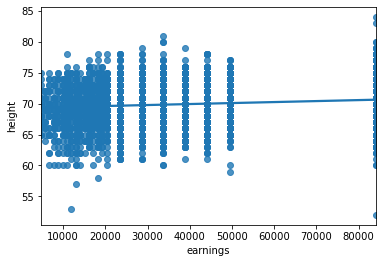

In [7]:
hdf=df[df['sex'].isin(['1:male'])]

from sklearn import linear_model
hregresion = linear_model.LinearRegression()
hearnings = hdf['earnings'].values.reshape((-1, 1))
hmodelo = hregresion.fit(hearnings, hdf['height'])
print("Pendiente Estimada Hombres (m)", mmodelo.coef_)
print("Intercepto Estimado Hombres (b)", mmodelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='earnings',y='height',data=hdf)

print("# de Registros que son Hombres, # de Columnas", hdf.shape)


# iii. Pruebe la hipótesis nula de que el efecto de Height sobre Earnings es el mismo para hombres y mujeres.

# Respuesta:

Esto se prueba al evidenciar que la pendiente y el intercepto tanto en Mujeres como Hombres son el mismo valor: Pendiente Estimada (m) 5.227632e-06 (Beta) e Intercepto Estimado (b) 64.254295. Si bien la cantidad de datos es diferente para cada población el agrupamiento de sus datos y/o la dispersión de estos son iguales.





# c. Una explicación para el efecto de Height sobre Earnings es que algunas profesiones requieren fortaleza, que esta correlacionada con Height.

# i. ¿Desaparece el efecto de Height sobre Earnings cuando la muestra está restringida a ocupaciones en las cuales la fortaleza es probablemente no importante?

# c) Respuesta:

Importante, aquí cambia de pocisión las varibles ya que si bien en el punto a) era Earnings sobre Height. En este punto nos hablan de Height sobre Earnings.

In [8]:
#Para responder a la pregunta recordaremos el encabezado de los datos 
df.head()

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0:female,48,"1:Married, sps in hh",13,1:Private company,3:South,non-hispanic white,84054.750000,65.0,133.0,1.0
1,0:female,41,6:Never Married,12,1:Private company,2:Midwest,non-hispanic white,14021.394531,65.0,155.0,1.0
2,0:female,26,"1:Married, sps in hh",16,1:Private company,1:Northeast,non-hispanic white,84054.750000,60.0,108.0,1.0
3,0:female,37,"1:Married, sps in hh",16,1:Private company,2:Midwest,non-hispanic white,84054.750000,67.0,150.0,1.0
4,0:female,35,6:Never Married,16,1:Private company,1:Northeast,non-hispanic white,28560.386719,68.0,180.0,1.0


In [9]:
#Sacamos los valores unicos de la columna occupation para saber cuantas regresiones debmos calcular por cada ocupación
# y así responder la pregunta
print('Estas son las categorias de occupation:',df['occupation'].unique())

Estas son las categorias de occupation: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


# Sacamos las 15 regresiones correspondientes a cada ocupación para responder a la pregunta:

Pendiente Estimada (m) [469.45807]
Intercepto Estimado (b) 27565.566
# de Registros, # de Columnas (1906, 11)


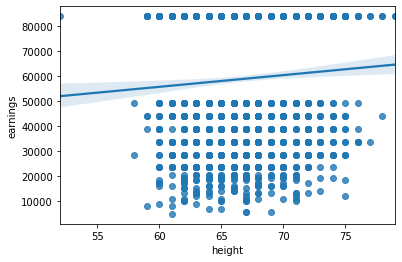

In [30]:
oc1df=df[df['occupation'].isin(['1'])]

from sklearn import linear_model
oc1regresion = linear_model.LinearRegression()
oc1height = oc1df['height'].values.reshape((-1, 1))
oc1modelo = oc1regresion.fit(oc1height, oc1df['earnings'])
print("Pendiente Estimada (m)", oc1modelo.coef_)
print("Intercepto Estimado (b)", oc1modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc1df)

print("# de Registros, # de Columnas", oc1df.shape)

Pendiente Estimada (m) [622.75525]
Intercepto Estimado (b) 19412.914
# de Registros, # de Columnas (3158, 11)


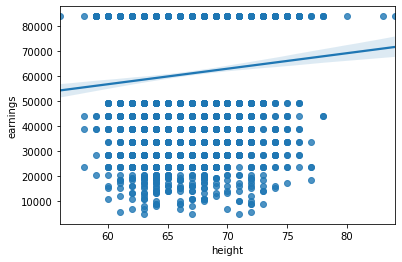

In [33]:
oc2df=df[df['occupation'].isin(['2'])]

from sklearn import linear_model
oc2regresion = linear_model.LinearRegression()
oc2height = oc2df['height'].values.reshape((-1, 1))
oc2modelo = oc2regresion.fit(oc2height, oc2df['earnings'])
print("Pendiente Estimada (m)", oc2modelo.coef_)
print("Intercepto Estimado (b)", oc2modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc2df)

print("# de Registros, # de Columnas", oc2df.shape)

Pendiente Estimada (m) [649.72186]
Intercepto Estimado (b) 6374.9336
# de Registros, # de Columnas (875, 11)


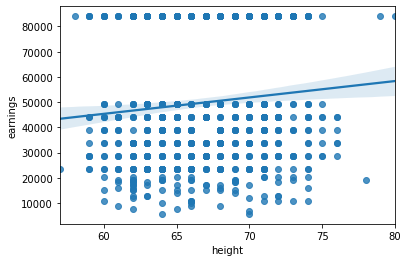

In [34]:
oc3df=df[df['occupation'].isin(['3'])]

from sklearn import linear_model
oc3regresion = linear_model.LinearRegression()
oc3height = oc3df['height'].values.reshape((-1, 1))
oc3modelo = oc3regresion.fit(oc3height, oc3df['earnings'])
print("Pendiente Estimada (m)", oc3modelo.coef_)
print("Intercepto Estimado (b)", oc3modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc3df)

print("# de Registros, # de Columnas", oc3df.shape)

Pendiente Estimada (m) [1372.385]
Intercepto Estimado (b) -44056.484
# de Registros, # de Columnas (1957, 11)


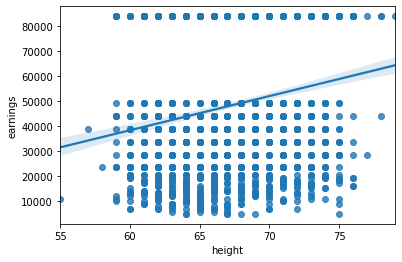

In [35]:
oc4df=df[df['occupation'].isin(['4'])]

from sklearn import linear_model
oc4regresion = linear_model.LinearRegression()
oc4height = oc4df['height'].values.reshape((-1, 1))
oc4modelo = oc4regresion.fit(oc4height, oc4df['earnings'])
print("Pendiente Estimada (m)", oc4modelo.coef_)
print("Intercepto Estimado (b)", oc4modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc4df)

print("# de Registros, # de Columnas", oc4df.shape)

Pendiente Estimada (m) [201.21582]
Intercepto Estimado (b) 32039.316
# de Registros, # de Columnas (3124, 11)


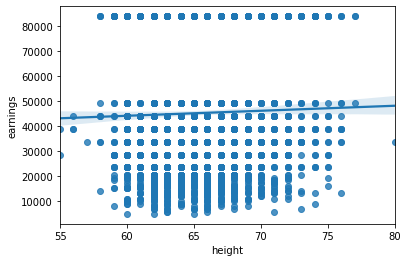

In [36]:
oc5df=df[df['occupation'].isin(['5'])]

from sklearn import linear_model
oc5regresion = linear_model.LinearRegression()
oc5height = oc5df['height'].values.reshape((-1, 1))
oc5modelo = oc5regresion.fit(oc5height, oc5df['earnings'])
print("Pendiente Estimada (m)", oc5modelo.coef_)
print("Intercepto Estimado (b)", oc5modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc5df)

print("# de Registros, # de Columnas", oc5df.shape)

Pendiente Estimada (m) [-172.89375]
Intercepto Estimado (b) 34652.945
# de Registros, # de Columnas (113, 11)


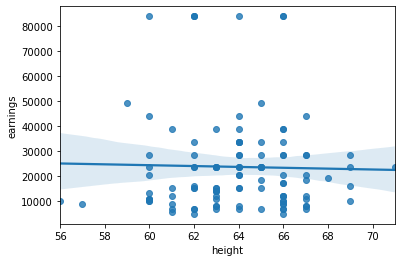

In [37]:
oc6df=df[df['occupation'].isin(['6'])]

from sklearn import linear_model
oc6regresion = linear_model.LinearRegression()
oc6height = oc6df['height'].values.reshape((-1, 1))
oc6modelo = oc6regresion.fit(oc6height, oc6df['earnings'])
print("Pendiente Estimada (m)", oc6modelo.coef_)
print("Intercepto Estimado (b)", oc6modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc6df)

print("# de Registros, # de Columnas", oc6df.shape)

Pendiente Estimada (m) [1503.0387]
Intercepto Estimado (b) -50438.992
# de Registros, # de Columnas (364, 11)


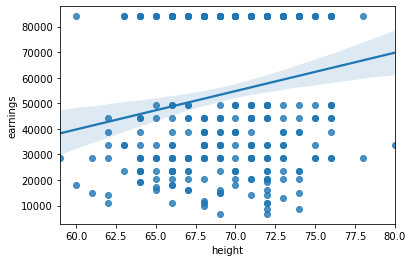

In [38]:
oc7df=df[df['occupation'].isin(['7'])]

from sklearn import linear_model
oc7regresion = linear_model.LinearRegression()
oc7height = oc7df['height'].values.reshape((-1, 1))
oc7modelo = oc7regresion.fit(oc7height, oc7df['earnings'])
print("Pendiente Estimada (m)", oc7modelo.coef_)
print("Intercepto Estimado (b)", oc7modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc7df)

print("# de Registros, # de Columnas", oc7df.shape)

Pendiente Estimada (m) [62.85743]
Intercepto Estimado (b) 26036.09
# de Registros, # de Columnas (1980, 11)


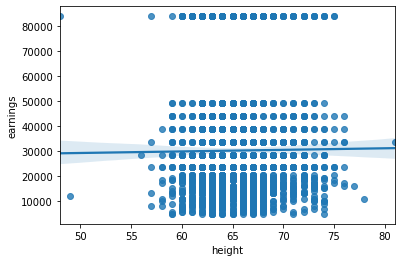

In [40]:
oc8df=df[df['occupation'].isin(['8'])]

from sklearn import linear_model
oc8regresion = linear_model.LinearRegression()
oc8height = oc8df['height'].values.reshape((-1, 1))
oc8modelo = oc8regresion.fit(oc8height, oc8df['earnings'])
print("Pendiente Estimada (m)", oc8modelo.coef_)
print("Intercepto Estimado (b)", oc8modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc8df)

print("# de Registros, # de Columnas", oc8df.shape)

Pendiente Estimada (m) [1049.2015]
Intercepto Estimado (b) -37768.055
# de Registros, # de Columnas (361, 11)


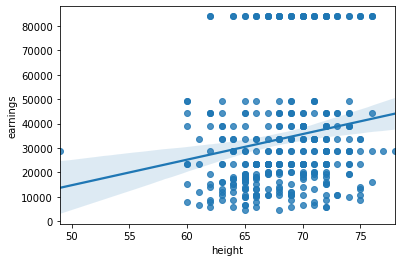

In [41]:
oc9df=df[df['occupation'].isin(['9'])]

from sklearn import linear_model
oc9regresion = linear_model.LinearRegression()
oc9height = oc9df['height'].values.reshape((-1, 1))
oc9modelo = oc9regresion.fit(oc9height, oc9df['earnings'])
print("Pendiente Estimada (m)", oc9modelo.coef_)
print("Intercepto Estimado (b)", oc9modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc9df)

print("# de Registros, # de Columnas", oc9df.shape)

Pendiente Estimada (m) [571.2231]
Intercepto Estimado (b) 6278.574
# de Registros, # de Columnas (534, 11)


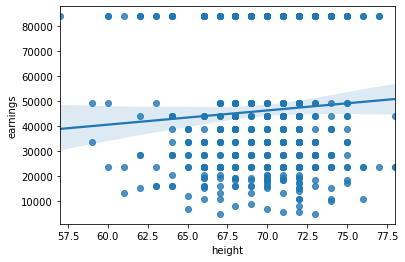

In [42]:
oc10df=df[df['occupation'].isin(['10'])]

from sklearn import linear_model
oc10regresion = linear_model.LinearRegression()
oc10height = oc10df['height'].values.reshape((-1, 1))
oc10modelo = oc10regresion.fit(oc10height, oc10df['earnings'])
print("Pendiente Estimada (m)", oc10modelo.coef_)
print("Intercepto Estimado (b)", oc10modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc10df)

print("# de Registros, # de Columnas", oc10df.shape)

Pendiente Estimada (m) [967.0091]
Intercepto Estimado (b) -26744.57
# de Registros, # de Columnas (616, 11)


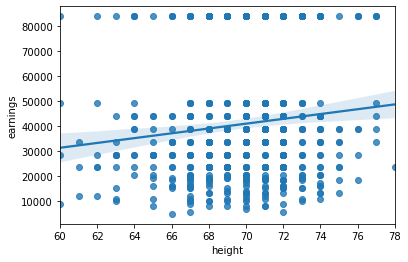

In [43]:
oc11df=df[df['occupation'].isin(['11'])]

from sklearn import linear_model
oc11regresion = linear_model.LinearRegression()
oc11height = oc11df['height'].values.reshape((-1, 1))
oc11modelo = oc11regresion.fit(oc11height, oc11df['earnings'])
print("Pendiente Estimada (m)", oc11modelo.coef_)
print("Intercepto Estimado (b)", oc11modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc11df)

print("# de Registros, # de Columnas", oc11df.shape)

Pendiente Estimada (m) [1080.3212]
Intercepto Estimado (b) -30029.75
# de Registros, # de Columnas (439, 11)


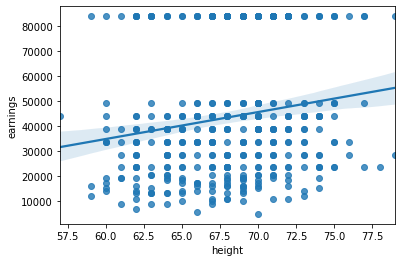

In [44]:
oc12df=df[df['occupation'].isin(['12'])]

from sklearn import linear_model
oc12regresion = linear_model.LinearRegression()
oc12height = oc12df['height'].values.reshape((-1, 1))
oc12modelo = oc12regresion.fit(oc12height, oc12df['earnings'])
print("Pendiente Estimada (m)", oc12modelo.coef_)
print("Intercepto Estimado (b)", oc12modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc12df)

print("# de Registros, # de Columnas", oc12df.shape)

Pendiente Estimada (m) [972.9098]
Intercepto Estimado (b) -29155.246
# de Registros, # de Columnas (1268, 11)


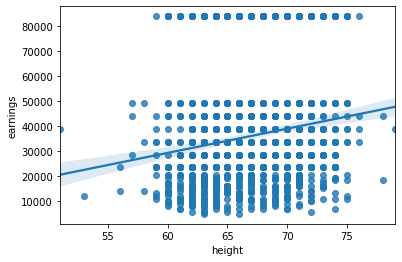

In [45]:
oc13df=df[df['occupation'].isin(['13'])]

from sklearn import linear_model
oc13regresion = linear_model.LinearRegression()
oc13height = oc13df['height'].values.reshape((-1, 1))
oc13modelo = oc13regresion.fit(oc13height, oc13df['earnings'])
print("Pendiente Estimada (m)", oc13modelo.coef_)
print("Intercepto Estimado (b)", oc13modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc13df)

print("# de Registros, # de Columnas", oc13df.shape)

Pendiente Estimada (m) [1138.4133]
Intercepto Estimado (b) -38731.945
# de Registros, # de Columnas (684, 11)


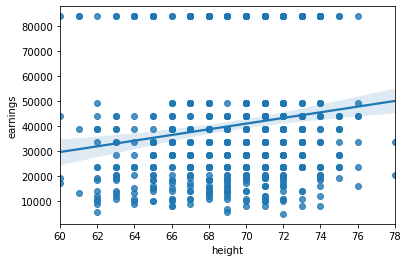

In [47]:
oc14df=df[df['occupation'].isin(['14'])]

from sklearn import linear_model
oc14regresion = linear_model.LinearRegression()
oc14height = oc14df['height'].values.reshape((-1, 1))
oc14modelo = oc14regresion.fit(oc14height, oc14df['earnings'])
print("Pendiente Estimada (m)", oc14modelo.coef_)
print("Intercepto Estimado (b)", oc14modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc14df)

print("# de Registros, # de Columnas", oc14df.shape)

Pendiente Estimada (m) [549.11523]
Intercepto Estimado (b) -4342.6797
# de Registros, # de Columnas (491, 11)


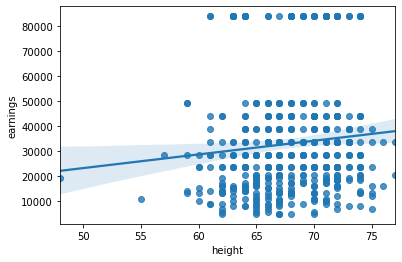

In [48]:
oc15df=df[df['occupation'].isin(['15'])]

from sklearn import linear_model
oc15regresion = linear_model.LinearRegression()
oc15height = oc15df['height'].values.reshape((-1, 1))
oc15modelo = oc15regresion.fit(oc15height, oc15df['earnings'])
print("Pendiente Estimada (m)", oc15modelo.coef_)
print("Intercepto Estimado (b)", oc15modelo.intercept_)

#Regresión y linea de tendencia
sns.regplot(x='height',y='earnings',data=oc15df)

print("# de Registros, # de Columnas", oc15df.shape)

# Miremos todas las pendientes dependiendo de las ocupaciones y saquemos conclusiones:

In [49]:
print("Pendiente Estimada ocupación 1  (m)", oc1modelo.coef_)
print("Pendiente Estimada ocupación 2  (m)", oc2modelo.coef_)
print("Pendiente Estimada ocupación 3  (m)", oc3modelo.coef_)
print("Pendiente Estimada ocupación 4  (m)", oc4modelo.coef_)
print("Pendiente Estimada ocupación 5  (m)", oc5modelo.coef_)
print("Pendiente Estimada ocupación 6  (m)", oc6modelo.coef_)
print("Pendiente Estimada ocupación 7  (m)", oc7modelo.coef_)
print("Pendiente Estimada ocupación 8  (m)", oc8modelo.coef_)
print("Pendiente Estimada ocupación 9  (m)", oc9modelo.coef_)
print("Pendiente Estimada ocupación 10 (m)", oc10modelo.coef_)
print("Pendiente Estimada ocupación 11 (m)", oc11modelo.coef_)
print("Pendiente Estimada ocupación 12 (m)", oc12modelo.coef_)
print("Pendiente Estimada ocupación 13 (m)", oc13modelo.coef_)
print("Pendiente Estimada ocupación 14 (m)", oc14modelo.coef_)
print("Pendiente Estimada ocupación 15 (m)", oc15modelo.coef_)

Pendiente Estimada ocupación 1  (m) [469.45807]
Pendiente Estimada ocupación 2  (m) [622.75525]
Pendiente Estimada ocupación 3  (m) [649.72186]
Pendiente Estimada ocupación 4  (m) [1372.385]
Pendiente Estimada ocupación 5  (m) [201.21582]
Pendiente Estimada ocupación 6  (m) [-172.89375]
Pendiente Estimada ocupación 7  (m) [1503.0387]
Pendiente Estimada ocupación 8  (m) [62.85743]
Pendiente Estimada ocupación 9  (m) [1049.2015]
Pendiente Estimada ocupación 10 (m) [571.2231]
Pendiente Estimada ocupación 11 (m) [967.0091]
Pendiente Estimada ocupación 12 (m) [1080.3212]
Pendiente Estimada ocupación 13 (m) [972.9098]
Pendiente Estimada ocupación 14 (m) [1138.4133]
Pendiente Estimada ocupación 15 (m) [549.11523]


height       -0.024112
weight        0.050351
educ          0.298131
earnings      1.000000
occupation         NaN
Name: earnings, dtype: float64


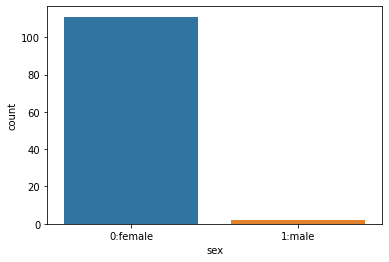

In [60]:
#Esta Ocupación es la que arrojó el # Menor de Beta
print(oc6df.corr()['earnings'].sort_values())
sns.countplot(x='sex',data=oc6df)

weight        0.098711
height        0.192328
educ          0.289432
earnings      1.000000
occupation         NaN
Name: earnings, dtype: float64


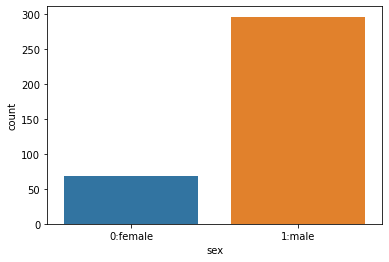

In [61]:
#Esta Ocupación es la que arrojó el # Mayor de Beta
print(oc7df.corr()['earnings'].sort_values())
sns.countplot(x='sex',data=oc7df)

weight       -0.030681
height        0.101921
educ          0.253660
earnings      1.000000
occupation         NaN
Name: earnings, dtype: float64


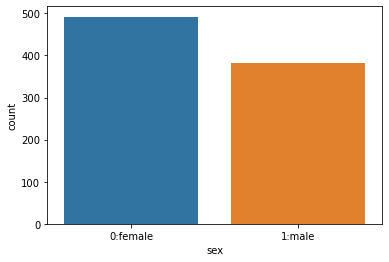

In [62]:
#Esta Ocupación es la que arrojó el Cuartil 2 de Beta
print(oc3df.corr()['earnings'].sort_values())
sns.countplot(x='sex',data=oc3df)